Examples of test images


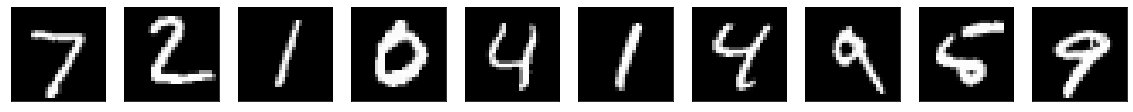

In [ ]:
from __future__ import print_function
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras import backend as K
from matplotlib import pyplot as plt

# Utility function for showing images
def show_imgs(x_test, n=10):
    sz = x_test.shape[1]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(sz,sz))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Pre-process inputs
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class indices to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('Examples of test images')
show_imgs(x_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

def get_model(activation='sigmoid'):
  tensorflow.random.set_seed(0) # make weight initialization deterministic
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(units=30,activation=activation))
  model.add(Dense(units=30,activation=activation))
  model.add(Dense(units=10,activation='softmax'))
  return model

model = get_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 30)                23550     
                                                                 
 dense_34 (Dense)            (None, 30)                930       
                                                                 
 dense_35 (Dense)            (None, 10)                310       
                                                                 
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 10

model = get_model()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
              loss='mse',metrics=['accuracy'])

# Fit model
history_mse = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            shuffle=True,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0912 - accuracy: 0.1132 - val_loss: 0.0904 - val_accuracy: 0.1337
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1257 - val_loss: 0.0898 - val_accuracy: 0.1214
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0897 - accuracy: 0.1186 - val_loss: 0.0896 - val_accuracy: 0.1201
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0896 - accuracy: 0.1169 - val_loss: 0.0895 - val_accuracy: 0.1196
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0894 - accuracy: 0.1189 - val_loss: 0.0894 - val_accuracy: 0.1195
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0893 - accuracy: 0.1201 - val_loss: 0.0892 - val_accuracy: 0.1257
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0892 - accuracy: 0.1286 - val_loss: 0.0891 - val_accuracy: 0.1379
Epoch 

In [ ]:
model = get_model()

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model
history_cce = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            shuffle=True,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 2.0421 - accuracy: 0.4320 - val_loss: 1.5427 - val_accuracy: 0.6499
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 1.1147 - accuracy: 0.7473 - val_loss: 0.7862 - val_accuracy: 0.8280
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.6580 - accuracy: 0.8453 - val_loss: 0.5436 - val_accuracy: 0.8664
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5030 - accuracy: 0.8725 - val_loss: 0.4453 - val_accuracy: 0.8860
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4296 - accuracy: 0.8873 - val_loss: 0.3912 - val_accuracy: 0.8973
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3834 - accuracy: 0.8958 - val_loss: 0.3548 - val_accuracy: 0.9064
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.9042 - val_loss: 0.3258 - val_accuracy: 0.9134
Epoch 

In [ ]:
model = get_model(activation='relu')

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model
history_relu = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            shuffle=True,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5190 - accuracy: 0.8503 - val_loss: 0.2958 - val_accuracy: 0.9121
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2647 - accuracy: 0.9231 - val_loss: 0.2422 - val_accuracy: 0.9265
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2158 - accuracy: 0.9370 - val_loss: 0.1958 - val_accuracy: 0.9430
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1844 - accuracy: 0.9468 - val_loss: 0.1707 - val_accuracy: 0.9494
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1616 - accuracy: 0.9526 - val_loss: 0.1591 - val_accuracy: 0.9519
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1451 - accuracy: 0.9576 - val_loss: 0.1515 - val_accuracy: 0.9549
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1314 - accuracy: 0.9611 - val_loss: 0.1336 - val_accuracy: 0.9613
Epoch 

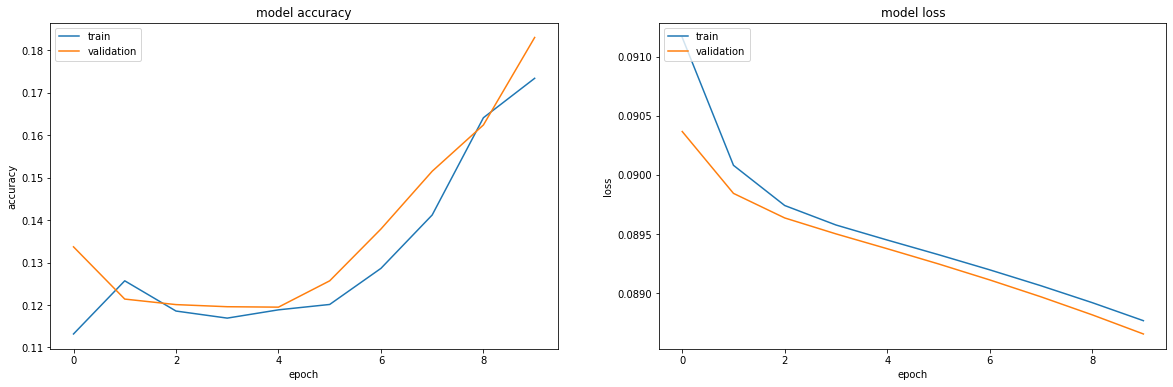

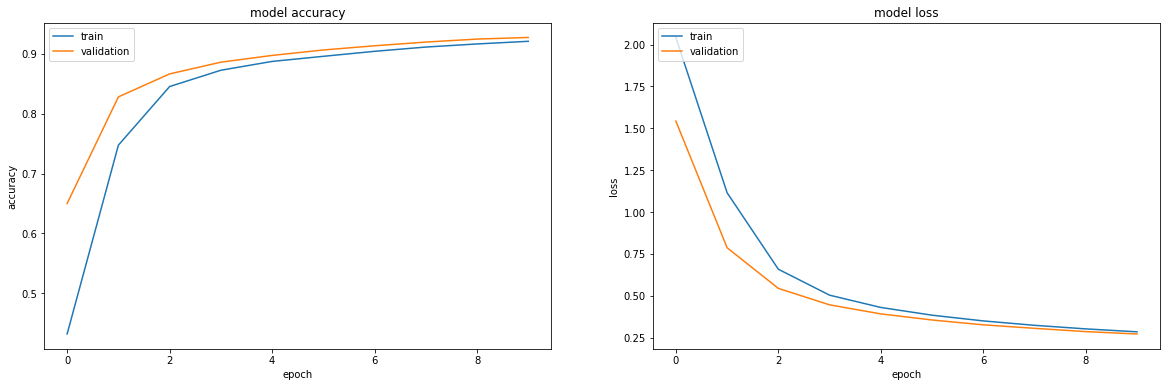

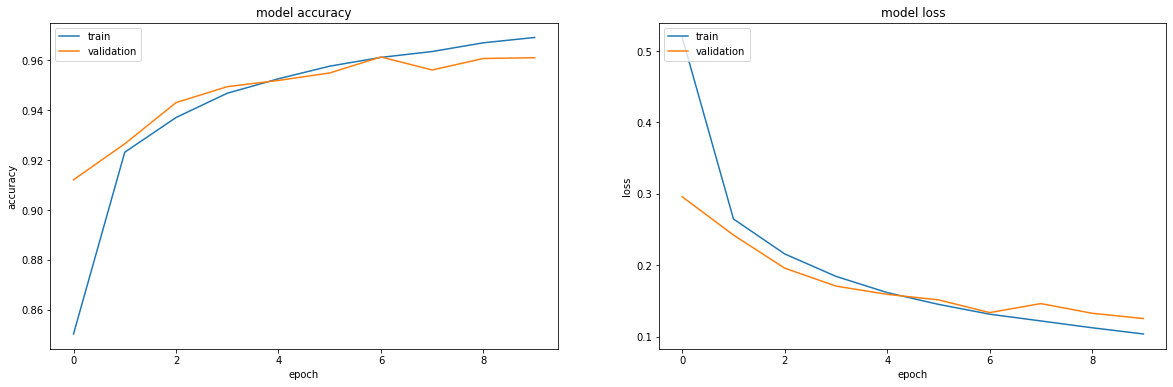

In [ ]:
import matplotlib.pyplot as plt

def show_history(history):
  plt.figure(figsize=(20,6))

  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')

  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_history(history_mse)
show_history(history_cce)
show_history(history_relu)

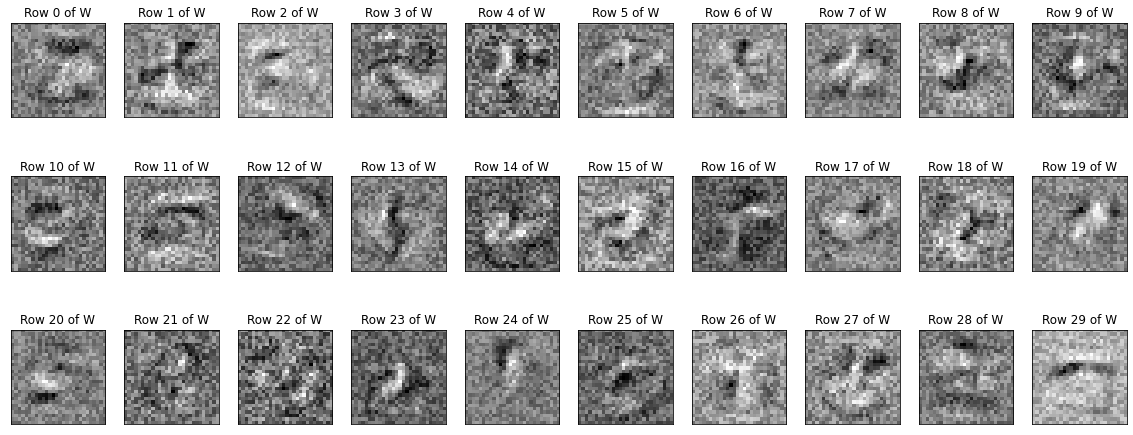

In [ ]:
layer = model.layers[1]
W = layer.get_weights()[0]
W = W.reshape((28,28,30)) # there are 10 classes and one 28x28 weight image per class
plt.figure(figsize=(20,8))
for i in range(30):
  ax = plt.subplot(3,10,i+1)
  plt.imshow(W[:,:,i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.gray()
  plt.title(f'Row {i} of W')